## Observations and Insights 

In [94]:
print('Tiffany Teasley aka Mathluva')
print('Student at UNC Data Analytics Bootcamp')
print('MatPlotLib Challenge')

Tiffany Teasley aka Mathluva
Student at UNC Data Analytics Bootcamp
MatPlotLib Challenge


In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_data = pd.merge(mouse_metadata, study_results, how='outer')
mice_data_count=mice_data['Mouse ID'].count() 
print(f'There are {mice_data_count} rows of data in the DataFrame.')

There are 1893 rows of data in the DataFrame.


In [96]:
# Checking the number of mice in the DataFrame.
mice_count = mice_data['Mouse ID'].nunique()
print(f'There are {mice_count} mice in the original DataFrame.')

There are 249 mice in the original DataFrame.


In [97]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mice_data['Mouse ID'][mice_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice.unique()
print(f'The duplicate mice by ID number that shows up for Mouse ID and Timepoint is/are {duplicate_mice.unique()}.')

The duplicate mice by ID number that shows up for Mouse ID and Timepoint is/are ['g989'].


In [98]:
#function to creat a list with duplicate mice id and print the information
dup_mice_list = []
def dup_mice(mice_list):
    for mice in mice_list:
        mice_data[mice_data['Mouse ID']==mice]
        dup_mice_list.append( mice_data[mice_data['Mouse ID']==mice])
    print(dup_mice_list)

In [99]:
# Optional: Get all the data for the duplicate mouse ID. 
if duplicate_mice.unique().size>0:
    print(f'The following are all the data for the duplicate mouse ID {duplicate_mice.unique()}:')
    dup_mice(duplicate_mice.unique())

The following are all the data for the duplicate mouse ID ['g989']:
[    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         3

In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = mice_data.drop(mice_data[mice_data['Mouse ID']=='g989'].index)
clean_mice_data_df= pd.DataFrame(clean_mice_data)
clean_mice_data_df_count=clean_mice_data_df['Mouse ID'].count()
print(f'The original DataFrame had {mice_data_count} rows of data.')
print(f'After dropping all the data associated with duplicate mouse {duplicate_mice.unique()}, there are now {clean_mice_data_df_count} rows of data.')

The original DataFrame had 1893 rows of data.
After dropping all the data associated with duplicate mouse ['g989'], there are now 1880 rows of data.


In [101]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = clean_mice_data_df['Mouse ID'].nunique()
print(f'After dropping the duplicate mice data, there are {mice_count2} number of mice in the clean DataFrame.')

After dropping the duplicate mice data, there are 248 number of mice in the clean DataFrame.


## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#by creating multiple series and putting them together
mice_data_mean = clean_mice_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mice_data_median= clean_mice_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mice_data_variance = clean_mice_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mice_data_standard_deviation= clean_mice_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mice_data_stand_err_mean = clean_mice_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
mice_data_statistics={'Tumor Volume Mean':mice_data_mean,'Tumor Volume Median':mice_data_median,'Tumor Volume Variance':mice_data_variance,   
                       'Tumor Volume Standard Deviation':mice_data_standard_deviation,'Tumor Volume SEM':mice_data_stand_err_mean}
mice_data_statistics_df = pd.DataFrame(mice_data_statistics)
np.round(mice_data_statistics_df, decimals=2)

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#by using a single groupby function
summary_table2 = clean_mice_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':{'mean','median', 'var','std','sem'}})
summary_table2_df=pd.DataFrame(summary_table2)                                                                                                                                  
np.round(summary_table2_df.rename(columns={'mean':'Mean','median':'Median','var':'Variance','std':'Standard Deviation','sem':'SEM'}), decimals =2)

Tumor Volume (mm3)                                         
                           Mean Standard Deviation   SEM Median Variance
Drug Regimen                                                            
Capomulin                 40.68               4.99  0.33  41.56    24.95
Ceftamin                  52.59               6.27  0.47  51.78    39.29
Infubinol                 52.88               6.57  0.49  51.82    43.13
Ketapril                  55.24               8.28  0.60  53.70    68.55
Naftisol                  54.33               8.13  0.60  52.51    66.17
Placebo                   54.03               7.82  0.58  52.29    61.17
Propriva                  52.32               6.62  0.54  50.45    43.85
Ramicane                  40.22               4.85  0.32  40.67    23.49
Stelasyn                  54.23               7.71  0.57  52.43    59.45
Zoniferol                 53.24               6.97  0.52  51.82    48.53

## Bar Plots

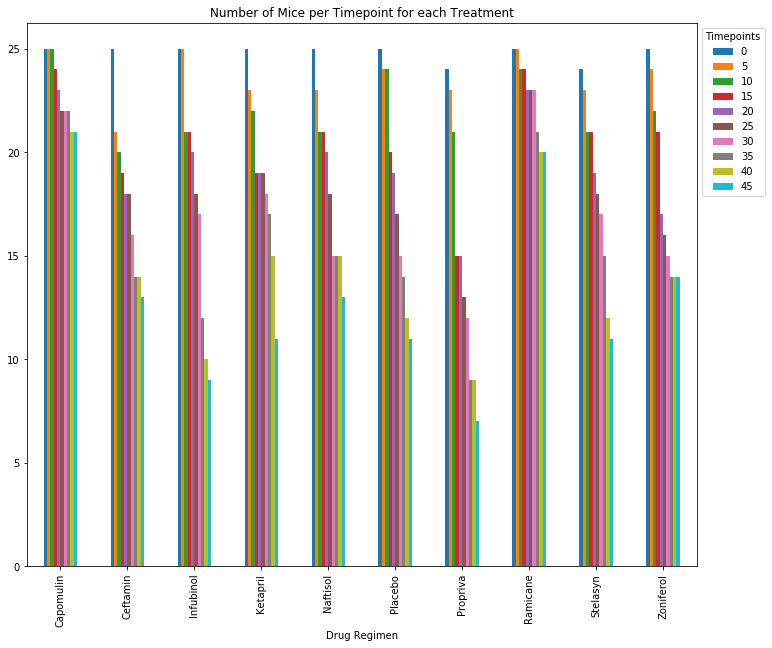

In [104]:
# Bar plot showing the number of mice per time point for each treatment throughout the course of the study 
#using pandas
bar_plot=clean_mice_data_df.groupby('Drug Regimen').Timepoint.value_counts().unstack().plot.bar(title='Number of Mice per Timepoint for each Treatment',figsize=(12,10)).legend(title='Timepoints',bbox_to_anchor=(1, 1))
bar_plot

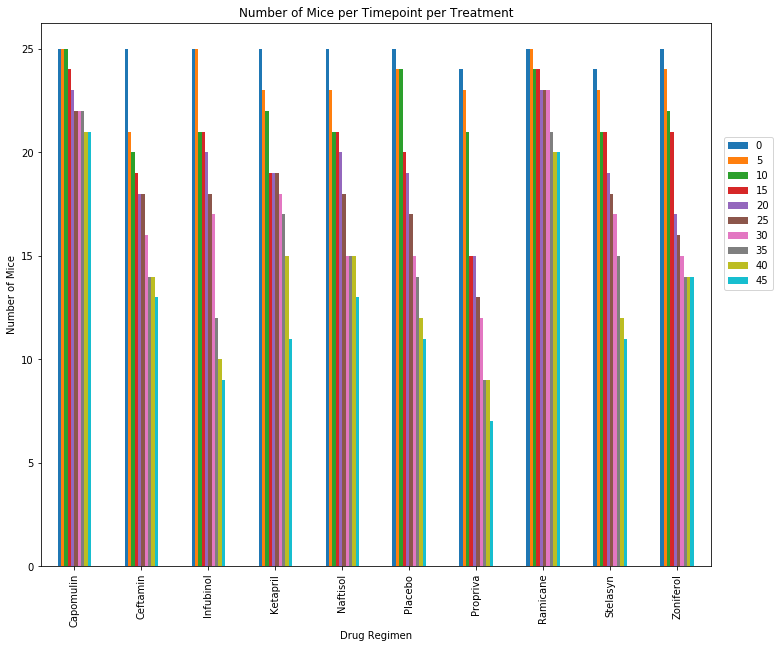

In [105]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
#using pyplot
clean_mice_data_df.groupby(['Drug Regimen','Timepoint']).size().unstack().plot(kind='bar', figsize=(12,10), legend='center')
plt.legend(loc='lower right',bbox_to_anchor=(1.10, .5))
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Timepoint per Treatment')
plt.show()

## Pie Plots

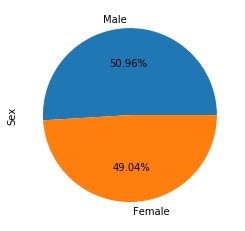

In [106]:
# Generate a pie plot showing the distribution of female versus male mice 
#using pandas
pie_chart=clean_mice_data_df['Sex'].value_counts().plot.pie(autopct='%1.2f%%')
pie_chart

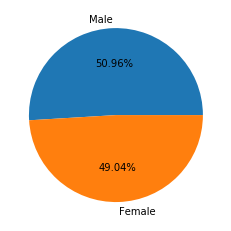

In [107]:
# Generate a pie plot showing the distribution of female versus male mice 
#using pyplot
plt.pie(clean_mice_data_df['Sex'].value_counts(), labels=clean_mice_data_df['Sex'].unique(), autopct='%1.2f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
final_tumor_volume =mice_data[['Mouse ID', 'Drug Regimen','Tumor Volume (mm3)',]].groupby(['Mouse ID']).last()
final_tumor_volume_df=pd.DataFrame(final_tumor_volume)
top_four_drugs = final_tumor_volume.loc[(final_tumor_volume['Drug Regimen']=='Infubinol')|(final_tumor_volume['Drug Regimen']=='Capomulin')|(final_tumor_volume['Drug Regimen']=='Ramicane')|(final_tumor_volume['Drug Regimen']=='Ceftamin')]
print(f'The following table is the final tumor volume for each mouse across Capomulin, Ceftamin, Ramicane and Infubinol:')
top_four_drugs

The following table is the final tumor volume for each mouse across Capomulin, Ceftamin, Ramicane and Infubinol:


,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,31.896238
y865,Ceftamin,64.729837


In [109]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=top_four_drugs['Tumor Volume (mm3)'].quantile([.25,.50,.75])
iqr=quartiles[.75]-quartiles[.25] #iqr = Q3-Q1
min_outlier_value = quartiles[.25] - (1.5*iqr)
max_outlier_value = quartiles[.75] + (1.5*iqr)
outliers_values =final_tumor_volume.loc[(final_tumor_volume['Tumor Volume (mm3)'] < min_outlier_value)|(final_tumor_volume['Tumor Volume (mm3)'] > max_outlier_value)]
print(f'Potential outliers are values below {np.round(min_outlier_value, decimals =2)} and greater than {np.round(max_outlier_value, decimals =2)}.')


Potential outliers are values below 3.07 and greater than 94.04.


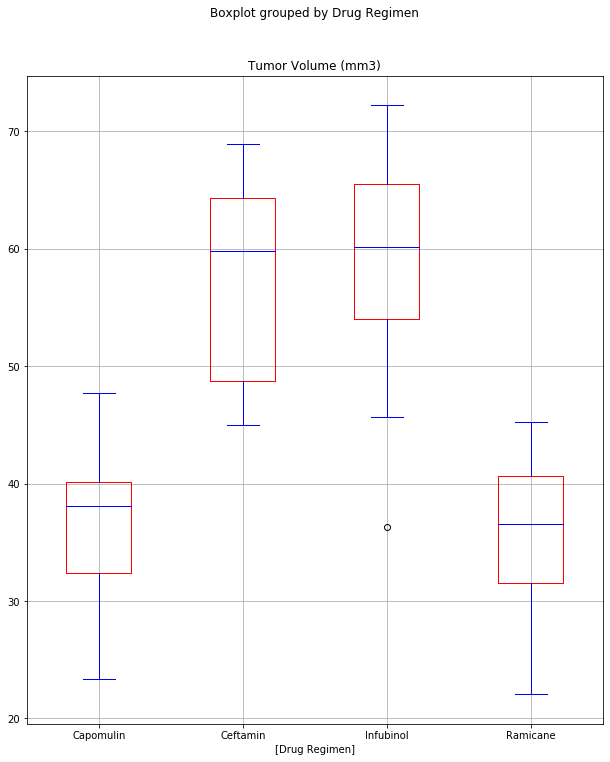

In [110]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
color = {'boxes': 'red', 'whiskers': 'blue','medians': 'blue', 'caps': 'blue'}
boxplot = top_four_drugs.boxplot(column=['Tumor Volume (mm3)'], by=['Drug Regimen'], figsize=(10,12), color=color)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

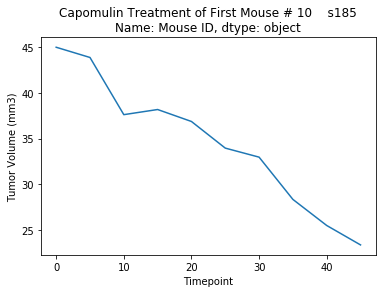

In [111]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
options = mice_data['Mouse ID'].loc[mice_data['Drug Regimen']=='Capomulin'].head(1)#first mouse with Capomulin treatment
capomulin = mice_data.loc[(mice_data['Drug Regimen']=='Capomulin')&(mice_data['Mouse ID'].isin(options))]
plt.plot(capomulin['Timepoint'], capomulin['Tumor Volume (mm3)'])
plt.title(f'Capomulin Treatment of First Mouse # {options}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

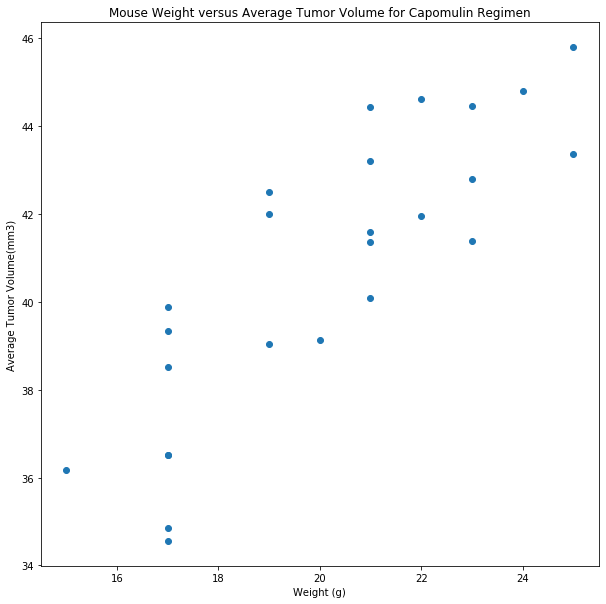

In [112]:
# Scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tumor_volume = mice_data.loc[mice_data['Drug Regimen']=='Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight =mice_data.loc[mice_data['Drug Regimen']=='Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()
plt.figure(figsize=(10,10))
plt.scatter(avg_weight ,avg_tumor_volume)
plt.title('Mouse Weight versus Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.show()

## Correlation and Regression

In [113]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight,avg_tumor_volume)
print(f'The correlation coefficient for mouse weight and average tumor volume for Capomulin regimen is {np.round(rvalue, decimals = 2)}.')
print(f'The linear regression model is y =  {np.round(slope, decimals =2)} x +  {np.round(intercept, decimals =2)}')

The correlation coefficient for mouse weight and average tumor volume for Capomulin regimen is 0.84.
The linear regression model is y =  0.95 x +  21.55


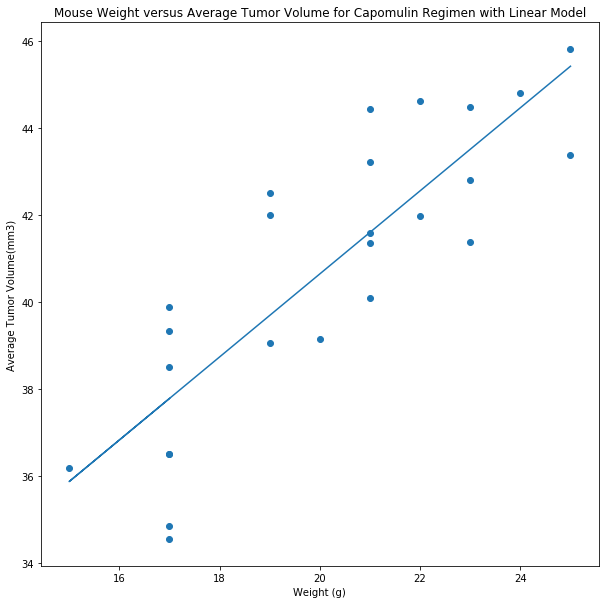

In [114]:
#scatter plot with linear regression model for mouse weight and average tumor volume for Capomulin regimen
x = mice_data.loc[(mice_data['Drug Regimen']=='Capomulin')]
regression_values = x['Weight (g)']*slope + intercept
plt.figure(figsize=(10,10))
plt.plot(x['Weight (g)'], regression_values)
plt.scatter(avg_weight ,avg_tumor_volume)
plt.title('Mouse Weight versus Average Tumor Volume for Capomulin Regimen with Linear Model')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.show()